### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)


In [0]:
tf.__version__



'1.14.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainX.shape

(60000, 28, 28)

In [0]:
trainY.shape

(60000,)

In [0]:
testX.shape

(10000, 28, 28)

In [0]:
testY.shape

(10000,)

In [0]:
# Convert train and test into categorical values using one-hot coding

trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [0]:
# Shape of Y in the Train set following the encoding

print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

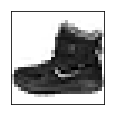

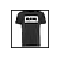

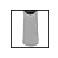

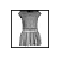

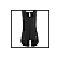

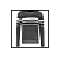

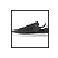

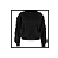

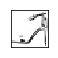

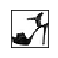

Labels [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
# First 10 images and their labels in the Training set


plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.show()

print ("Labels", trainY[0])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [0]:
# Executing the model with above parameters

model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 0s 7us/sample - loss: 202.9617 - acc: 0.1205 - val_loss: 6234.9214 - val_acc: 0.4079
Epoch 2/100
60000/60000 [==============================] - 0s 4us/sample - loss: 6217.9370 - acc: 0.4103 - val_loss: 8814.1143 - val_acc: 0.2745
Epoch 3/100
60000/60000 [==============================] - 0s 5us/sample - loss: 8845.0176 - acc: 0.2717 - val_loss: 11826.9043 - val_acc: 0.2729
Epoch 4/100
60000/60000 [==============================] - 0s 4us/sample - loss: 11798.7246 - acc: 0.2761 - val_loss: 13906.1650 - val_acc: 0.1398
Epoch 5/100
60000/60000 [==============================] - 0s 4us/sample - loss: 13856.8584 - acc: 0.1390 - val_loss: 10329.0576 - val_acc: 0.1739
Epoch 6/100
60000/60000 [==============================] - 0s 4us/sample - loss: 10214.8232 - acc: 0.1725 - val_loss: 12310.6660 - val_acc: 0.2184
Epoch 7/100
60000/60000 [==============================] - 0s 4us/sample -

In [0]:
model.summary()

# Accuracy is close to 74% with the above parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Repeat the model by adding Normalization layer

#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model

In [103]:
# Executing the model with above parameters

model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

# With batch Normalisation, accuracy for an epoch of 100 ended at about 72%

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/sample - loss: 3.3318 - acc: 0.0696 - val_loss: 26.3452 - val_acc: 0.0544
Epoch 2/100
60000/60000 [==============================] - 1s 12us/sample - loss: 2.9600 - acc: 0.0980 - val_loss: 15.4771 - val_acc: 0.0956
Epoch 3/100
60000/60000 [==============================] - 1s 12us/sample - loss: 2.6563 - acc: 0.1341 - val_loss: 10.8217 - val_acc: 0.1409
Epoch 4/100
60000/60000 [==============================] - 1s 12us/sample - loss: 2.4115 - acc: 0.1752 - val_loss: 8.3032 - val_acc: 0.1775
Epoch 5/100
60000/60000 [==============================] - 1s 12us/sample - loss: 2.2144 - acc: 0.2195 - val_loss: 6.7631 - val_acc: 0.2043
Epoch 6/100
60000/60000 [==============================] - 1s 12us/sample - loss: 2.0546 - acc: 0.2664 - val_loss: 5.7326 - val_acc: 0.2273
Epoch 7/100
60000/60000 [==============================] - 1s 12us/sample - loss: 1.9238 - acc: 0.3123 - va

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Customize the learning rate to 0.001 in SGD
from tensorflow.keras.optimizers import SGD

# Repeat the model by adding Normalization layer

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
sgd = SGD(lr=0.001)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
# Executing the mode with learning rate 0.001 of SGD

model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])

# With the above parameters, accuracy for an epoch of 100 ended at about 41%

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/sample - loss: 3.2067 - acc: 0.0853 - val_loss: 29.3034 - val_acc: 0.1051
Epoch 2/100
60000/60000 [==============================] - 1s 12us/sample - loss: 3.1732 - acc: 0.0879 - val_loss: 20.4714 - val_acc: 0.1083
Epoch 3/100
60000/60000 [==============================] - 1s 12us/sample - loss: 3.1404 - acc: 0.0905 - val_loss: 16.4440 - val_acc: 0.1112
Epoch 4/100
60000/60000 [==============================] - 1s 12us/sample - loss: 3.1082 - acc: 0.0933 - val_loss: 13.9991 - val_acc: 0.1148
Epoch 5/100
60000/60000 [==============================] - 1s 12us/sample - loss: 3.0766 - acc: 0.0959 - val_loss: 12.3084 - val_acc: 0.1183
Epoch 6/100
60000/60000 [==============================] - 1s 12us/sample - loss: 3.0455 - acc: 0.0991 - val_loss: 11.0479 - val_acc: 0.1224
Epoch 7/100
60000/60000 [==============================] - 1s 12us/sample - loss: 3.0150 - acc: 0.1022 -

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Model Building
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()


#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense layer for prediction - Keras declares weights and bias automatically with 100 neurons
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd Dense layer with 100 neurons
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 3rd Dense layer with 10 neurons
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Output layer with 10 neurons as there're 10 class values
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Model compilation with SGD and Cross-Entropy
sgd = SGD(lr=0.03)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

## Review model

In [99]:
# Executing the mode with learning rate 0.001 of SGD

model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100,
          batch_size=trainX.shape[0])


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/sample - loss: 2.3887 - acc: 0.0948 - val_loss: 2.3792 - val_acc: 0.0834
Epoch 2/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3856 - acc: 0.0918 - val_loss: 2.3765 - val_acc: 0.0806
Epoch 3/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3826 - acc: 0.0873 - val_loss: 2.3739 - val_acc: 0.0777
Epoch 4/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3797 - acc: 0.0820 - val_loss: 2.3714 - val_acc: 0.0745
Epoch 5/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3769 - acc: 0.0779 - val_loss: 2.3689 - val_acc: 0.0712
Epoch 6/100
60000/60000 [==============================] - 1s 19us/sample - loss: 2.3743 - acc: 0.0747 - val_loss: 2.3665 - val_acc: 0.0686
Epoch 7/100
60000/60000 [==============================] - 1s 20us/sample - loss: 2.3717 - acc: 0.0763 - val_l

### Run the model

In [101]:
# Accuracy of the model

model.evaluate(testX,testY)

# 19% - Accuracy

10000/10000 [==============================] - 0s 35us/sample - loss: 2.2954 - acc: 0.1882


[2.2954134101867676, 0.1882]